# Metrices 
### 1)Accuracy ,precision , Recall,f1_score
### 2) Confusion matrix , classification report 
### 3)


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objects as go
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import os 

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
X=df.drop(columns=['target'])
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

In [6]:
X.shape

(1025, 13)

In [7]:
lr=LogisticRegression()
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()

In [8]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

/Users/rabinpoudel/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [9]:
y_pred_lr=lr.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_dt=dt.predict(X_test)
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [10]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n")

In [11]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_dt, "Decision Tree")

Logistic Regression Performance:
Accuracy: 0.79
Precision: 0.74
Recall: 0.87
F1 Score: 0.80


Random Forest Performance:
Accuracy: 0.99
Precision: 1.00
Recall: 0.97
F1 Score: 0.99


Decision Tree Performance:
Accuracy: 0.99
Precision: 1.00
Recall: 0.97
F1 Score: 0.99




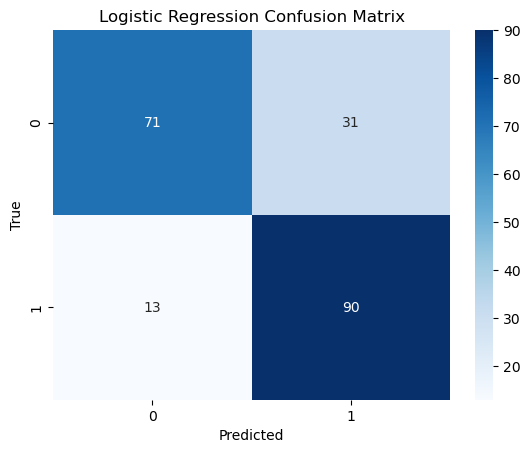

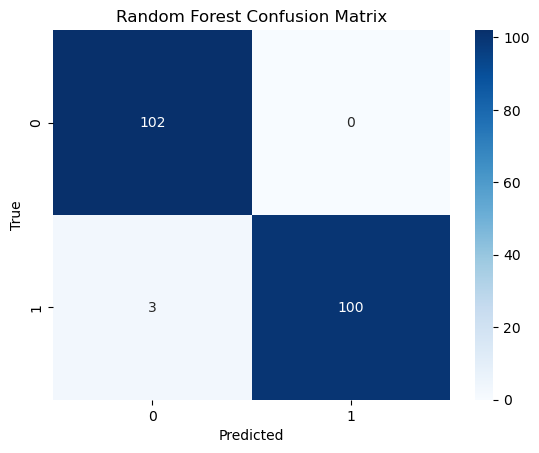

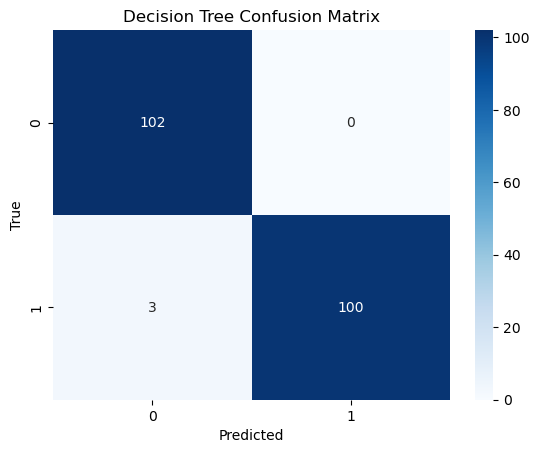

In [12]:
plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree Confusion Matrix')

In [13]:
print("confusion matrix",confusion_matrix(y_test, y_pred_lr))
print("confusion matrix",confusion_matrix(y_test, y_pred_rf))
print("confusion matrix",confusion_matrix(y_test, y_pred_dt))


confusion matrix [[71 31]
 [13 90]]
confusion matrix [[102   0]
 [  3 100]]
confusion matrix [[102   0]
 [  3 100]]


# 1)Accuracy score , precision , recall  ,f1-score 

In [14]:
classification_report = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_dt)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_dt)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_dt)],
    'F1 Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_dt)]
})
classification_report = classification_report.sort_values(by='F1 Score', ascending=False)
classification_report.reset_index(drop=True, inplace=True)
classification_report

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.985366,1.000000,0.970874,0.985222
1,Decision Tree,0.985366,1.000000,0.970874,0.985222
2,Logistic Regression,0.785366,0.743802,0.873786,0.803571


# 2) Classification report

In [15]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [17]:
classification_report = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_dt)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_dt)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_dt)],
    'F1 Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_dt)]
})
classification_report = classification_report.sort_values(by='F1 Score', ascending=False)
classification_report.reset_index(drop=True, inplace=True)
classification_report


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.985366,1.000000,0.970874,0.985222
1,Decision Tree,0.985366,1.000000,0.970874,0.985222
2,Logistic Regression,0.785366,0.743802,0.873786,0.803571


# 3) 

In [22]:
df1=pd.read_csv("diabetes.csv")

In [23]:
df1.shape

(768, 9)

In [24]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
X=df1.drop(columns="Outcome")

In [27]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [28]:
Y=df1.Outcome

In [29]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [65]:
xx_train,xx_test,yy_train,yy_test=train_test_split(X,Y,test_size=0.2, random_state=2)

In [66]:
lr=LogisticRegression()

In [67]:
lr.fit(xx_train,yy_train)

LogisticRegression()

In [68]:
y_pred=lr.predict(xx_test)
Y_score=lr.predict_proba(xx_test)[:,1]


In [56]:
Y_score=lr.predict_proba(xx_test)
Y_score #72% chance of class 0, 27% chance of class 1 for the first sample

array([[0.72464604, 0.27535396],
       [0.80517822, 0.19482178],
       [0.88358057, 0.11641943],
       [0.83570849, 0.16429151],
       [0.53862001, 0.46137999],
       [0.56706954, 0.43293046],
       [0.98382386, 0.01617614],
       [0.35008143, 0.64991857],
       [0.45821074, 0.54178926],
       [0.23793953, 0.76206047],
       [0.74024192, 0.25975808],
       [0.10706408, 0.89293592],
       [0.66024588, 0.33975412],
       [0.70070968, 0.29929032],
       [0.91480313, 0.08519687],
       [0.61371003, 0.38628997],
       [0.85721727, 0.14278273],
       [0.92206604, 0.07793396],
       [0.1354729 , 0.8645271 ],
       [0.4367539 , 0.5632461 ],
       [0.79719617, 0.20280383],
       [0.92097606, 0.07902394],
       [0.4533535 , 0.5466465 ],
       [0.9022019 , 0.0977981 ],
       [0.45886308, 0.54113692],
       [0.11489789, 0.88510211],
       [0.87072871, 0.12927129],
       [0.96908013, 0.03091987],
       [0.74345894, 0.25654106],
       [0.88471602, 0.11528398],
       [0.

In [69]:
Y_score

array([0.04953505, 0.1745783 , 0.09362182, 0.25515961, 0.63554752,
       0.11671761, 0.06566891, 0.42184236, 0.04866023, 0.57561548,
       0.33872281, 0.41303775, 0.69852565, 0.19965644, 0.02001915,
       0.82466888, 0.86654225, 0.03100878, 0.25511822, 0.89493231,
       0.95244791, 0.83480694, 0.11740142, 0.44674841, 0.08922484,
       0.06882458, 0.651238  , 0.4119747 , 0.17863041, 0.28688814,
       0.24551807, 0.4390511 , 0.0094224 , 0.24258461, 0.35165011,
       0.9616379 , 0.34363816, 0.8092208 , 0.2938015 , 0.05082374,
       0.18183945, 0.0867259 , 0.42229798, 0.18738361, 0.0301139 ,
       0.03948889, 0.24739698, 0.42781736, 0.10530951, 0.37967547,
       0.99355778, 0.10670809, 0.39107127, 0.76879011, 0.36864273,
       0.45773921, 0.95035122, 0.41993686, 0.39164727, 0.04375784,
       0.37290477, 0.9012801 , 0.88176229, 0.88840841, 0.33083167,
       0.06931403, 0.9526301 , 0.20055385, 0.26053554, 0.35463811,
       0.10358714, 0.08168976, 0.45043092, 0.09222292, 0.08648

In [70]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(yy_test,Y_score)

In [71]:
thresholds

array([       inf, 0.99355778, 0.9526301 , 0.95244791, 0.82466888,
       0.76879011, 0.7620136 , 0.68391532, 0.67533582, 0.67419989,
       0.651238  , 0.65080916, 0.63554752, 0.58631529, 0.57561548,
       0.56981054, 0.52525034, 0.47014113, 0.46129408, 0.45043092,
       0.4390511 , 0.43867749, 0.42229798, 0.41993686, 0.41303775,
       0.4119747 , 0.40477511, 0.37967547, 0.36864273, 0.31026437,
       0.30879619, 0.27772464, 0.2720016 , 0.25845537, 0.25515961,
       0.24739698, 0.24551807, 0.23662878, 0.22887644, 0.18183945,
       0.17863041, 0.1745783 , 0.1732912 , 0.14639953, 0.14076332,
       0.11671761, 0.1149274 , 0.11000293, 0.10670809, 0.08922484,
       0.0867259 , 0.02001915, 0.01931791, 0.00160803])

In [72]:
len(thresholds)

54

In [73]:
import plotly.graph_objects as go
import numpy as np


# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name='ROC curve'
)

# Only label every nth point to avoid cluttering
n = 10  
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices], 
    y=tpr[indices], 
    mode='markers+text', 
    name='Threshold points', 
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]], 
    textposition='top center'
)


# Diagonal line
trace2 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=False
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


## 4) Optimal threshold 

In [74]:

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)


Optimal threshold is: 0.36864272947717613


In [75]:
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import roc_auc_score

# Assuming fpr, tpr, thresholds are already calculated as before
fpr, tpr, thresholds = roc_curve(yy_test, Y_score)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(yy_test, Y_score)

# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name=f'ROC curve (Area = {roc_auc:.2f})'
)

# Only label every nth point to avoid cluttering
n = 10
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices], 
    y=tpr[indices], 
    mode='markers+text', 
    name='Threshold points', 
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]], 
    textposition='top center'
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


In [77]:


scaler = StandardScaler()
xx_train_scaled = scaler.fit_transform(xx_train)
xx_test_scaled = scaler.transform(xx_test)

# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(xx_train, yy_train)
lr_scores = lr_model.predict_proba(xx_test)[:,1]

# SVM model
svm_model = SVC(probability=True)
svm_model.fit(xx_train_scaled, yy_train)
svm_scores = svm_model.predict_proba(xx_test_scaled)[:,1]

# Generate ROC curve data for logistic regression model
lr_fpr, lr_tpr, lr_thresholds = roc_curve(yy_test, lr_scores)
lr_auc = roc_auc_score(yy_test, lr_scores)

# Generate ROC curve data for SVM model
svm_fpr, svm_tpr, svm_thresholds = roc_curve(yy_test, svm_scores)
svm_auc = roc_auc_score(yy_test, svm_scores)

# Generate a trace for the Logistic Regression ROC curve
trace0 = go.Scatter(
    x=lr_fpr,
    y=lr_tpr,
    mode='lines',
    name=f'Logistic Regression (Area = {lr_auc:.2f})'
)

# Generate a trace for the SVM ROC curve
trace1 = go.Scatter(
    x=svm_fpr,
    y=svm_tpr,
    mode='lines',
    name=f'SVM (Area = {svm_auc:.2f})'
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()
